#Consumo de población de agua en el estado de Nuevo León

##Uso de agua en habitaciones multifamiliar
  

Bajo la hipótesis `se considera que un consumo razonable y eficiente de agua para un hogar en Nuevo León es de aproximadamente 125 litros por persona al día`. Esto puede variar según factores y variables externas, como por ejemplo, el hecho que bajo simulación Monte Carlo, expropiaremos como funcionaria dicho proyecto.



```
BIBLIOTECAS ESTADISTICAS
```



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import random



```
SUPUESTO
```



Bajo San Padreo Garza García teniendo un gasto diario `máximo de 650 litros de agua`, mientras el promedio normal del área metropolitana por habitante es de `156 litros`, lo cuál se espera que sea una métrica ideal para aterrizar nuestro proyecto. Esta hipótesis son consideradas en casa habitación multifamiliar.

Es importante tener en cuenta que:
  * Existen factores que se distribuyen uniformemente en la población (distribución uniforme):
    * El tamaño de la familia
    * El número de baños
    * La presencia de jardín
  * Mientras que el uso de agua en la zona metropolitana, pueden seguir una distribución Normal:
    * Tenemos la media de uso, y el valor máximo del uso del agua.

In [ ]:
#Generamos valores aleatorios bajo una distribución uniforme
def generar_valor_uniforme(min_value, max_value):
  return random.uniform(min_value, max_value)

def generar_valor_triangular(media, valor_maximo):
  c = random.uniform(media, valor_maximo)
  valor_generado = random.triangular(media, valor_maximo, c)
  #Como el consumo de Agua no puede ser negativo, entra a modificación
  while valor_generado <= 0:
    c = random.uniform(media, valor_maximo)
    valor_generado = random.triangular(media, valor_maximo, c)
  return valor_generado

media = 156 #Media del uso delagua
valor_maximo = 650 #Valor Máximo que se usa en Nuevo León

In [ ]:
#Generar datos adicionales bajo una distribución asociada a la real
def generar_datos_uniformes(num_datos):
  nuevos_datos = []
  for _ in range(num_datos):
    valor_generado = generar_valor_triangular(media, valor_maximo)  #Generar valor aleatorio bajo distribución triangular
    nuevo_registro = [
        int(generar_valor_uniforme(1, 6)), #Número de Habitantes
        int(generar_valor_uniforme(1, 4)), #Número de Baños
        int(generar_valor_uniforme(0,1)), #Uso de Jardín (0=No, 1=Sí)
        int(valor_generado) #Consumo de Agua Diario (Litros)
    ]
    nuevos_datos.append(nuevo_registro)
  return nuevos_datos

Hay varias razones por las cuales se pueden buscar más de mil simulaciones en diferentes contextos:
1. **Validación estadística:** Al realizar múltiples simulaciones, se puede obtener una muestra estadística más robusta para analizar los resultados. Cuantas más simulaciones se realicen, mayor será la confianza en los datos obtenidos y en las conclusiones que se puedan extraer.
2. **Análisis de escenarios:** Las simulaciones se utilizan a menudo para explorar diferentes escenarios y evaluar los posibles resultados. Al realizar más de mil simulaciones, se pueden tener en cuenta una amplia gama de condiciones y variables, lo que permite obtener una visión más completa de las posibles situaciones y sus implicaciones.
3. **Sensibilidad de parámetros:** En algunas simulaciones, existen múltiples parámetros que pueden afectar los resultados. Al realizar una gran cantidad de simulaciones y variar sistemáticamente los parámetros, se puede analizar la sensibilidad de cada uno de ellos y comprender mejor cómo influyen en los resultados.
4. **Optimización:** En ciertos casos, las simulaciones se utilizan para encontrar la mejor solución o configuración óptima dentro de un conjunto de variables y restricciones. Al realizar múltiples simulaciones, se pueden explorar diferentes combinaciones y determinar cuál es la más adecuada según los criterios definidos.

*En resumen, buscar más de mil simulaciones puede proporcionar un análisis más exhaustivo, una mayor confianza en los resultados, una mejor comprensión de la sensibilidad de los parámetros, una optimización más precisa y una evaluación más completa de la incertidumbre y el riesgo.*



```
Población de Simulación de Datos de 1,000,000 de personas.
```



In [ ]:
#Generar 1_000_000 nuevos registros bajo una distribución uniforme
nuevos_registros = generar_datos_uniformes(100_000)

In [ ]:
Agua = pd.DataFrame(nuevos_registros, columns=['Número de Habitantes', 'Número de Baños',
                                             'Uso de Jardín (Sí/No)', 'Consumo de Agua Diario (Litros)'])

In [ ]:
#Visualización de los primeros datos
Agua.head()

,Número de Habitantes,Número de Baños,Uso de Jardín (Sí/No),Consumo de Agua Diario (Litros)
0,1,3,0,276
1,4,1,0,320
2,3,2,0,260
3,5,1,0,398
4,5,1,0,566


*Podemos observar que los datos, mantienen una similitud a datos reales.*


##Regresión Lineal de Consumo

Con las variables 'Número de Habitantes', 'Número de Baños' y 'Uso de Jardín (Sí/No)', y el objetivo de predecir el 'Consumo de Agua Diario (Litros)', puedes utilizar técnicas de machine learning para construir un modelo que pueda realizar predicciones basadas en esos datos. Aquí hay algunas cosas que puedes hacer con machine learning en este contexto:

Regresión: Puedes utilizar algoritmos de regresión, como la regresión lineal, regresión de bosque aleatorio o regresión de vectores de soporte (SVR), para predecir el consumo de agua diario en función de las variables predictoras. Estos modelos intentarán encontrar una relación matemática entre las variables independientes y la variable dependiente para hacer predicciones.



```
BIBLIOTECA PARA REGRESIÓN
```



Se usa el supuesto de tener un regresión 
lineal de consumo, teniendo datos despues de 30 días que recopila el dispositivo y los sube a la nube.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import accuracy_score

*Usando un 25% del tamaño de la muestra, como variables de entrenamiento*

In [ ]:
#Dividir los datos en características(X) y variable objetivo (y)
#Variables dependientes de consumo
X = Agua.drop('Consumo de Agua Diario (Litros)', axis=1)
#Variable predictoria
y = Agua['Consumo de Agua Diario (Litros)']

#Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
#Crear y entrenar el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

#Predecir los valores para los datos de prueba
y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.00248




```
MÉTODO MINÍMOS CUADRADOS
```



In [ ]:
#Definimos la variable dependientes y explicatorias
y=Agua['Consumo de Agua Diario (Litros)']
x1=Agua[['Número de Habitantes', 'Número de Baños','Uso de Jardín (Sí/No)']]

In [ ]:
#Añadir una constante a X para estimar el intercepto
X = sm.add_constant(x1)

#Crear el modelo de regresión OLS
model = sm.OLS(y, x1)

# Ajustar (entrenar) el modelo a los datos
results = model.fit()

In [ ]:
results.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1934: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                                       OLS Regression Results                                       
====================================================================================================
Dep. Variable:     Consumo de Agua Diario (Litros)   R-squared (uncentered):                   0.841
Model:                                         OLS   Adj. R-squared (uncentered):              0.841
Method:                              Least Squares   F-statistic:                          2.649e+05
Date:                             Sun, 28 May 2023   Prob (F-statistic):                        0.00
Time:                                     07:47:21   Log-Likelihood:                     -6.5377e+05
No. Observations:                           100000   AIC:                                  1.308e+06
Df Residuals:                                99998   BIC:                                  1.308e+06
Df Model:                                        2                                                  
Covariance Type:                         nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Número de Habitantes     52.5222      0.292    179.635      0.000      51.949      53.095
Número de Baños         104.7412      0.450    232.935      0.000     103.860     105.623
Uso de Jardín (Sí/No)          0          0        nan        nan           0           0
==============================================================================
Omnibus:                     1132.320   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              700.988
Skew:                          -0.001   Prob(JB):                    6.06e-153
Kurtosis:                       2.590   Cond. No.                          inf
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**RELACIÓN SIGNIFICATIVA ENTRE LAS VARIABLES EXPLICATIVAS Y LA VARIABLE DEPENDIENTE**

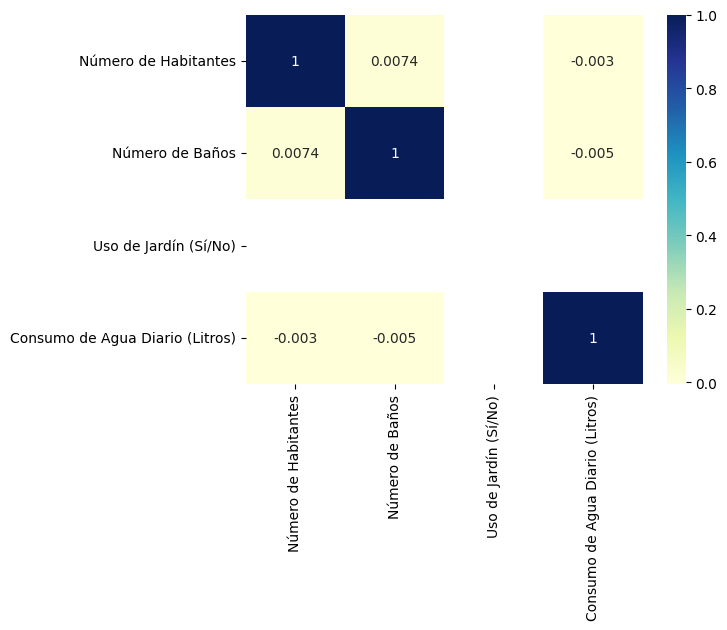

In [ ]:
#Mapa gráfico de la correlación
data_plot = sns.heatmap(Agua.corr(),  cmap = "YlGnBu" ,  annot = True)

##Clasificación de Consumo

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
#Definimos la variable dependientes y explicatorias
Y=Agua['Consumo de Agua Diario (Litros)']
X=Agua[['Número de Habitantes', 'Número de Baños','Uso de Jardín (Sí/No)']]

In [ ]:
#Convertir variables categóricas en numéricas (si es necesario)
le = LabelEncoder()
Agua['Uso de Jardín (Sí/No)'] = le.fit_transform(Agua['Uso de Jardín (Sí/No)'])

#Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(Agua.drop('Consumo de Agua Diario (Litros)', axis=1),
                                                    Agua['Consumo de Agua Diario (Litros)'],
                                                    test_size=0.2, random_state=42)

#Crear una instancia del modelo de Bosque Aleatorio
modelo = RandomForestClassifier()

#Entrenar el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)

#Hacer predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

#Calcular la precisión del modelo
precision = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", precision)

Precisión del modelo: 0.00295
